In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [25]:
iris= load_iris()

In [26]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
import pandas as pd
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [28]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


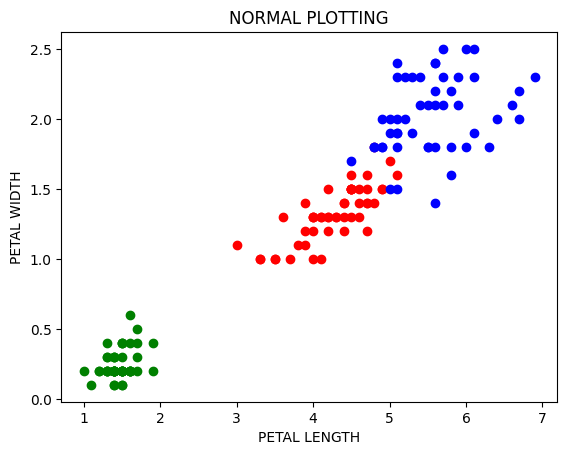

In [30]:
r1=df[df.target==0]
r2=df[df.target==1]
r3=df[df.target==2]
plt.title('NORMAL PLOTTING')
plt.scatter(r1['petal length (cm)'],r1['petal width (cm)'],color='green')
plt.scatter(r2['petal length (cm)'],r2['petal width (cm)'],color='red')
plt.scatter(r3['petal length (cm)'],r3['petal width (cm)'],color='blue')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')
plt.show()

In [31]:
#now using KMeans Clustering approach
df=df.drop(['sepal length (cm)','sepal width (cm)','target'],axis='columns')


In [32]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [33]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=3)
t= km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=t

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


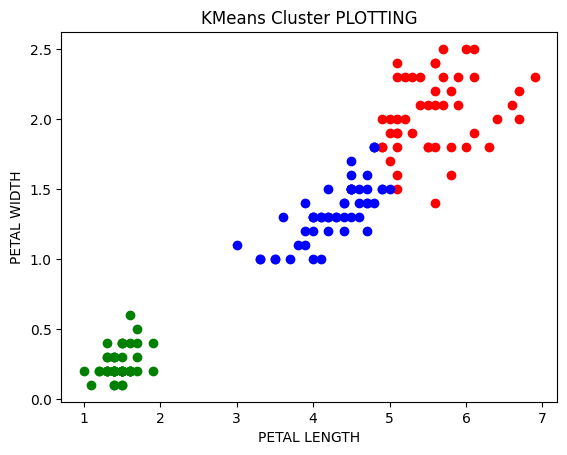

In [36]:
d1=df[df.cluster==0]
d2=df[df.cluster==1]
d3=df[df.cluster==2]
plt.title('KMeans Cluster PLOTTING')
plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='green')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='red')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='blue')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler()
mn.fit(df[['petal length (cm)']])
df['len_n']=mn.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),cluster,len_n
0,1.4,0.2,0,0.067797
1,1.4,0.2,0,0.067797
2,1.3,0.2,0,0.050847
3,1.5,0.2,0,0.084746
4,1.4,0.2,0,0.067797
...,...,...,...,...
145,5.2,2.3,1,0.711864
146,5.0,1.9,1,0.677966
147,5.2,2.0,1,0.711864
148,5.4,2.3,1,0.745763


In [41]:
mn.fit(df[['petal width (cm)']])
df['wid_n']=mn.transform(df[['petal width (cm)']])
df=df.drop(['petal length (cm)','petal width (cm)'],axis='columns')


In [42]:
df

,cluster,len_n,wid_n
0,0,0.067797,0.041667
1,0,0.067797,0.041667
2,0,0.050847,0.041667
3,0,0.084746,0.041667
4,0,0.067797,0.041667
...,...,...,...
145,1,0.711864,0.916667
146,1,0.677966,0.750000
147,1,0.711864,0.791667
148,1,0.745763,0.916667


In [43]:
gr= km.fit_predict(df[['len_n','wid_n']])
df['Flowers']= gr
df=df.drop(['cluster'],axis='columns')
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,len_n,wid_n,Flowers
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


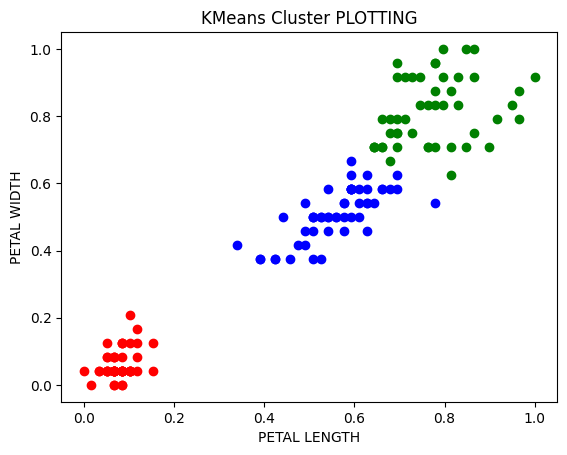

In [47]:
a=df[df.Flowers==0]
b=df[df.Flowers==1]
c=df[df.Flowers==2]
plt.title('KMeans Cluster PLOTTING')
plt.scatter(a['len_n'],a['wid_n'],color='green')
plt.scatter(b['len_n'],b['wid_n'],color='red')
plt.scatter(c['len_n'],c['wid_n'],color='blue')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')
plt.show()

In [52]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

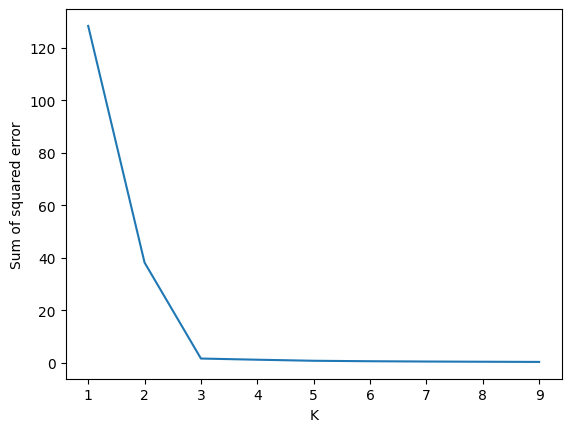

In [53]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()